In [2]:
getwd()
#setwd("/sharedFolder/Paper_clusters_from_scratch/")
getwd()

[1] "/sharedFolder/data_organoidi_velasco/Paper_clusters_from_scratch"

[1] "/sharedFolder/data_organoidi_velasco/Paper_clusters_from_scratch"

In [6]:
# LOAD LIBRARIES
library(Seurat)
library(tidyverse)
library(future)
library(ggplot2)
library(dplyr)
library(presto)
#library(enrichR)
library(cowplot)

In [4]:
# SET UP NAMES
timepoints <- c("23days","1month","1.5month","2month","3month","4month","5month","6month")
housekeeping_genes <- c("ACTB","DLG4")
genes_of_interest <- c("SRCIN1","KIAA1217","CIT")
path_to_data <- "/sharedFolder/data_organoidi_velasco/Data/"

# sc_data <- ""

name_new_dir_0 <- paste(getwd(),"/Results",sep="")
if (!dir.exists(name_new_dir_0)) {
  dir.create(name_new_dir_0)
} 

name_new_dir_partial <- paste(getwd(),"/Partial",sep="")
if (!dir.exists(name_new_dir_partial)) {
  dir.create(name_new_dir_partial)
} 

In [21]:
i <- 2
print(timepoints[i])

[1] "1month"


In [22]:
# LOAD DATA AND CREATE&NORMALIZE SEURAT OBJECT

# Load
sc_data <- Read10X(data.dir = paste(path_to_data, "expression_", timepoints[i], sep=""), gene.column = 1) 
    
# Create Seurat object
sc_data <- CreateSeuratObject(counts = sc_data, min.cells = 3, min.features = 500, project = timepoints[i], names.delim = "-", names.field = 2)
    
# Normalize the data
sc_data <- NormalizeData(sc_data, normalization.method = "LogNormalize", scale.factor = 1e6)
    
# Identify variable features
sc_data <- FindVariableFeatures(sc_data, selection.method = "mvp", nfeatures = 2000)

# Scale data 
sc_data <- ScaleData(sc_data)

Warning message:
“Input parameters result in NA values for initial cell identities. Setting all initial idents to the project name”
Normalizing layer: counts

Finding variable features for layer data

Centering and scaling data matrix



Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 71372
Number of edges: 2685108

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9116
Number of communities: 42
Elapsed time: 18 seconds


2 singletons identified. 40 final clusters.




   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
7162 5595 4269 4126 3764 3613 3064 3040 2673 2397 2218 2123 2043 2042 1935 1919 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
1730 1617 1583 1439 1285 1267 1231 1158 1084 1007  774  739  669  579  522  483 
  32   33   34   35   36   37   38   39 
 403  358  346  296  251  222  195  151 


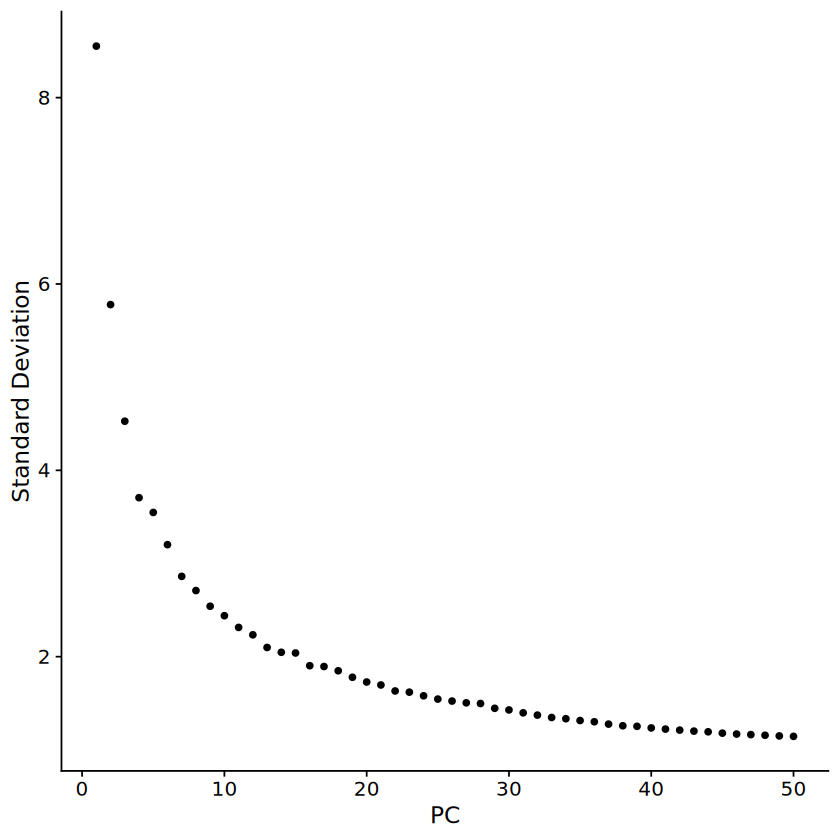

In [23]:
# PCA&Clusterization 

# PCA
sc_data <- RunPCA(sc_data, npcs = 50, verbose = FALSE)
print(ElbowPlot(object = sc_data, ndims = 50))
    
# Cluster the cells
res <- 1

sc_data <- FindNeighbors(sc_data, dims = 1:40)
sc_data <- FindClusters(sc_data, resolution = res)

print(table(Idents(sc_data)))

In [24]:
# Save
save(sc_data, file = paste(name_new_dir_partial, "/PCA_res_",res,"_",timepoints[i],".Robj", sep=""))

In [15]:
#load(paste(name_new_dir_partial, "/PCA_",timepoints[i],".Robj", sep=""))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
08:13:22 UMAP embedding parameters a = 0.9922 b = 1.112

08:13:22 Read 29736 rows and found 40 numeric columns

08:13:22 Using Annoy for neighbor search, n_neighbors = 30

08:13:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:13:26 Writing NN index file to temp file /tmp/Rtmp3Lzb2D/file241e9e240a

08:13:26 Searching Annoy index using 1 thread, search_k = 3000

08:13:37 Annoy recall = 100%

08:13:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

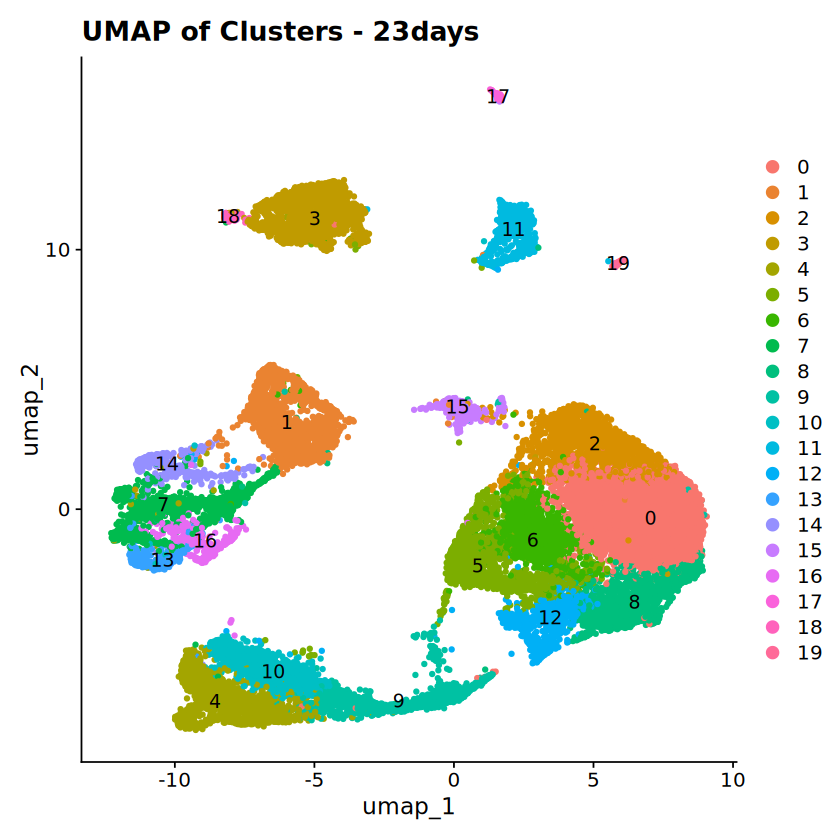

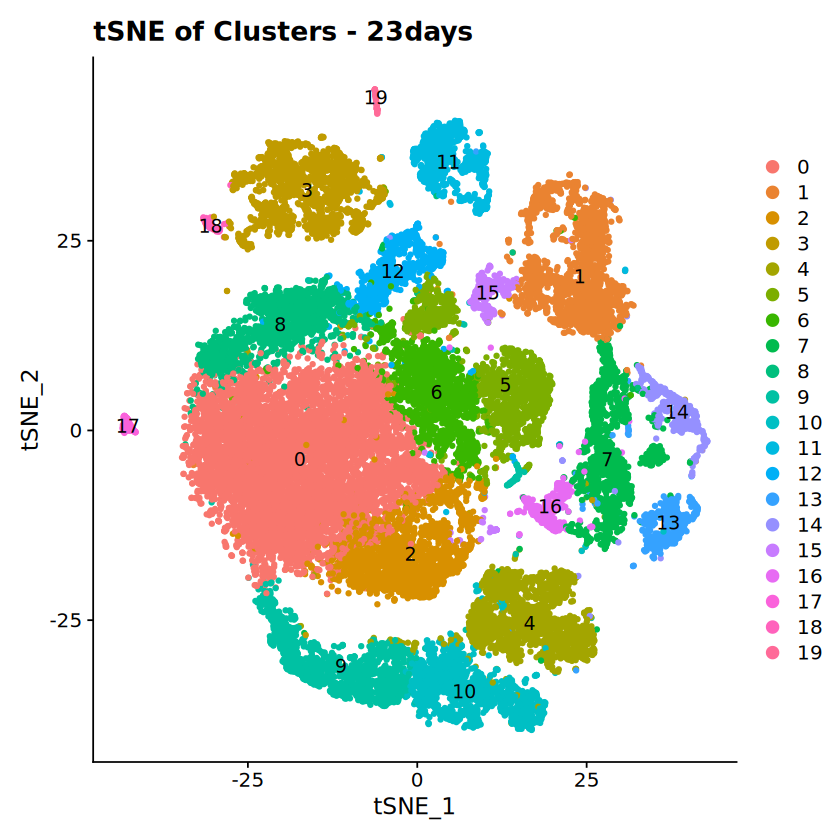

In [7]:
# UMAP & tSNE

sc_data_UMAP <- RunUMAP(sc_data, dims = 1:40)
sc_data_tSNE <- RunTSNE(sc_data, dims = 1:40)

plot_UMAP <- DimPlot(sc_data_UMAP, reduction = "umap", label = TRUE, pt.size = 1) + ggtitle(paste("UMAP of Clusters -",timepoints[i]))
plot_tSNE <- DimPlot(sc_data_tSNE, reduction = "tsne", label = TRUE, pt.size = 1) + ggtitle(paste("tSNE of Clusters -",timepoints[i]))
plot_UMAP
plot_tSNE

# CombinePlots(plot=list(plot_UMAP,plot_tSNE), ncol=2)

In [25]:
# FIND ALL MARKERS

cluster_markers <- FindAllMarkers(sc_data,
                                  only.pos = TRUE,   # Considera solo i marker espressi positivamente
                                  min.pct = 0.25,    # Percentuale minima di espressione nelle cellule del cluster
                                  logfc.threshold = 0.25)  # Soglia minima di LogFC

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32

Calculating cluster 33

Calculating cluster 34

Calculating cluster 35

Calculating cluster 36

Calculating cluster 37

Calculating cluster 38

Calculating cluster 39



In [26]:
de_genes <- cluster_markers %>% filter(gene %in% genes_of_interest) 
print(de_genes)

                  p_val avg_log2FC pct.1 pct.2     p_val_adj cluster     gene
CIT        0.000000e+00  3.0578819 0.499 0.050  0.000000e+00      10      CIT
KIAA1217  5.057354e-295  1.4059139 0.298 0.074 1.287349e-290      10 KIAA1217
KIAA12171  0.000000e+00  1.8559716 0.312 0.074  0.000000e+00      12 KIAA1217
SRCIN1    2.218181e-287  1.9409597 0.288 0.069 5.646380e-283      14   SRCIN1
SRCIN11   4.036044e-218  2.3014914 0.272 0.070 1.027375e-213      17   SRCIN1
SRCIN12   2.791548e-237  2.1693878 0.318 0.071 7.105884e-233      22   SRCIN1
CIT1      1.750343e-100  1.8544184 0.256 0.062  4.455497e-96      27      CIT
KIAA12172  0.000000e+00  1.3831897 0.590 0.077  0.000000e+00      30 KIAA1217
CIT2      1.284798e-166  0.8506545 0.377 0.062 3.270452e-162      30      CIT
SRCIN13    8.939078e-44  0.8892115 0.301 0.074  2.275442e-39      35   SRCIN1


In [27]:
#cluster_markers_list <- lapply(0:19, function(j) {FindMarkers(sc_data, ident.1 = j, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)})
#names(cluster_markers_list) <- paste0("cluster_", 0:19)

In [28]:
#summary(cluster_markers_list)

           Length Class      Mode
cluster_0  5      data.frame list
cluster_1  5      data.frame list
cluster_2  5      data.frame list
cluster_3  5      data.frame list
cluster_4  5      data.frame list
cluster_5  5      data.frame list
cluster_6  5      data.frame list
cluster_7  5      data.frame list
cluster_8  5      data.frame list
cluster_9  5      data.frame list
cluster_10 5      data.frame list
cluster_11 5      data.frame list
cluster_12 5      data.frame list
cluster_13 5      data.frame list
cluster_14 5      data.frame list
cluster_15 5      data.frame list
cluster_16 5      data.frame list
cluster_17 5      data.frame list
cluster_18 5      data.frame list
cluster_19 5      data.frame list

In [27]:
expression_goi <- FetchData(sc_data, vars = genes_of_interest, layer = "data")
expression_hk <- FetchData(sc_data, vars = housekeeping_genes, layer = "data")

In [28]:
Vln_goi <- VlnPlot(sc_data, features = genes_of_interest, group.by = "seurat_clusters")
Vln_hk <- VlnPlot(sc_data, features = housekeeping_genes, group.by = "seurat_clusters")

ggsave(paste0("Results/Vln_goi_",timepoints[i],".png"), Vln_goi, width = 12, height = 10)
ggsave(paste0("Results/Vln_hk_",timepoints[i],".png"), Vln_hk, width = 12, height = 10)

[[1]]
                           Df Sum Sq Mean Sq F value Pr(>F)    
sc_data$seurat_clusters    19   1053   55.43    51.4 <2e-16 ***
Residuals               29716  32047    1.08                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[[2]]
                           Df Sum Sq Mean Sq F value Pr(>F)    
sc_data$seurat_clusters    19   1170   61.57   55.12 <2e-16 ***
Residuals               29716  33190    1.12                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[[3]]
                           Df Sum Sq Mean Sq F value Pr(>F)    
sc_data$seurat_clusters    19   1852   97.49   131.5 <2e-16 ***
Residuals               29716  22024    0.74                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


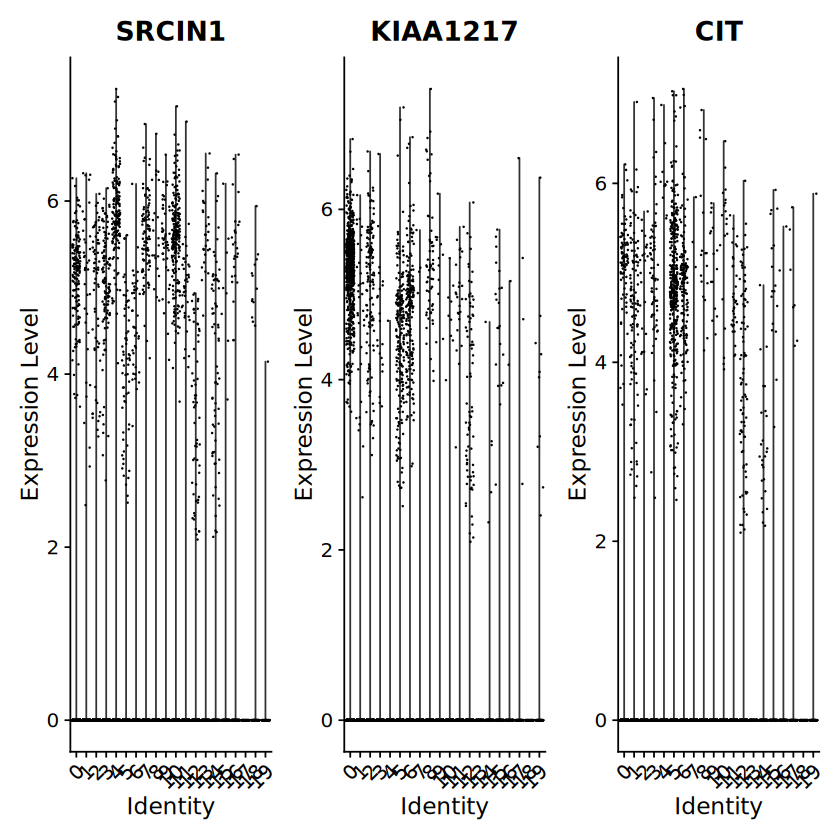

In [33]:
anova_results <- lapply(genes_of_interest, function(gene) {
  # Perform ANOVA
  aov_result <- aov(expression_goi[[gene]] ~ sc_data$seurat_clusters)
  summary(aov_result)
})

# View the results
anova_results

# Fetch normalized data
expression_goi_norm <- FetchData(sc_data, vars = genes_of_interest, layer = "data")

# Plot with normalized data
VlnPlot(sc_data, features = genes_of_interest, group.by = "seurat_clusters", layer = "data")

In [38]:
ratio_plot_list <- list()

for (goi in 1:length(genes_of_interest)) {



    for (hk in 1:length(housekeeping_genes)) {


        
    }
}

goi_hk <- c(genes_of_interest[1],housekeeping_genes[1])
expression_data <- FetchData(sc_data, vars = goi_hk, layer = "data")

#summary(expression_data)
#expression_data$SRCIN1 == expression_data[,1]

expression_data$ratio <- expression_data[,1] / expression_data[,2]
#expression_data$ratio <- expression_data$SRCIN1 / expression_data$ACTB

expression_data$cluster <- sc_data$seurat_clusters[colnames(sc_data)]


# Plot a histogram of the SRCIN1/ACTB ratio for each cluster
ratio <-ggplot(expression_data, aes(x = ratio, fill = cluster)) +
            geom_histogram(binwidth = 0.2, position = "dodge", alpha = 0.7) +
            labs(title = paste0("Histogram of ",genes_of_interest[1],"/",housekeeping_genes[1]," Ratio by Cluster"),
                 x = paste0(genes_of_interest[1],"/",housekeeping_genes[1]," Ratio"),
                 y = "Number of Cells") +
            theme_minimal() +
            theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
            scale_fill_manual(values = rainbow(length(unique(expression_data$cluster)))) 


print(ratio)

ERROR: Error in lenght(housekeeping_genes): could not find function "lenght"


Warning message:
“Removed 284 rows containing non-finite outside the scale range (`stat_bin()`).”


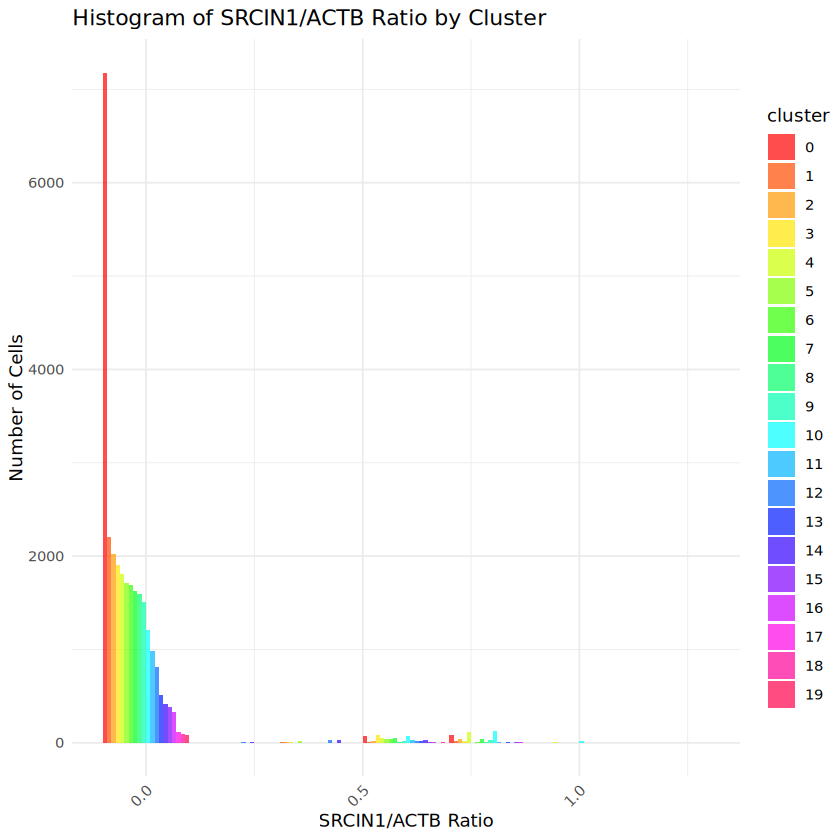

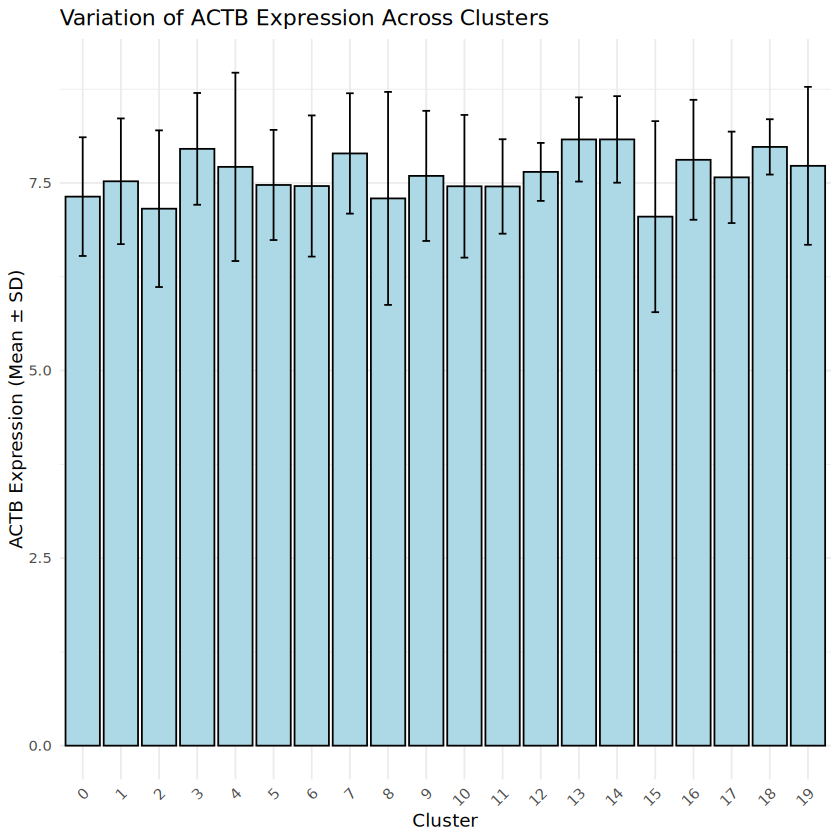

In [27]:
# Calculate the ratio of SRCIN1 to ACTB for each cell
goi_hk <- c(genes_of_interest[1],housekeeping_genes[1])
expression_data <- FetchData(sc_data, vars = goi_hk, layer = "data")

expression_data$ratio <- (expression_data$SRCIN1 / expression_data$ACTB)

# Add the cluster information to the data
expression_data$cluster <- sc_data$seurat_clusters[colnames(sc_data)]

# Now, we have a data frame where each cell has the SRCIN1/ACTB ratio and its associated cluster



library(ggplot2)

# Plot a histogram of the SRCIN1/ACTB ratio for each cluster
ggplot(expression_data, aes(x = ratio, fill = cluster)) +
  geom_histogram(binwidth = 0.2, position = "dodge", alpha = 0.7) +
  labs(title = "Histogram of SRCIN1/ACTB Ratio by Cluster",
       x = "SRCIN1/ACTB Ratio",
       y = "Number of Cells") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_manual(values = rainbow(length(unique(expression_data$cluster)))) 


# Calculate the mean and standard deviation of ACTB expression for each cluster
ACTB_stats <- aggregate(ACTB ~ cluster, data = expression_data, FUN = function(x) c(mean = mean(x), sd = sd(x)))

# Flatten the data for better visualization
ACTB_stats <- do.call(data.frame, ACTB_stats)

# Plot the mean and SD of ACTB expression across clusters
ggplot(ACTB_stats, aes(x = cluster, y = ACTB.mean)) +
  geom_bar(stat = "identity", fill = "lightblue", color = "black") +
  geom_errorbar(aes(ymin = ACTB.mean - ACTB.sd, ymax = ACTB.mean + ACTB.sd), width = 0.2) +
  labs(title = "Variation of ACTB Expression Across Clusters",
       x = "Cluster",
       y = "ACTB Expression (Mean ± SD)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 54 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 59 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 40 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 33 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warni

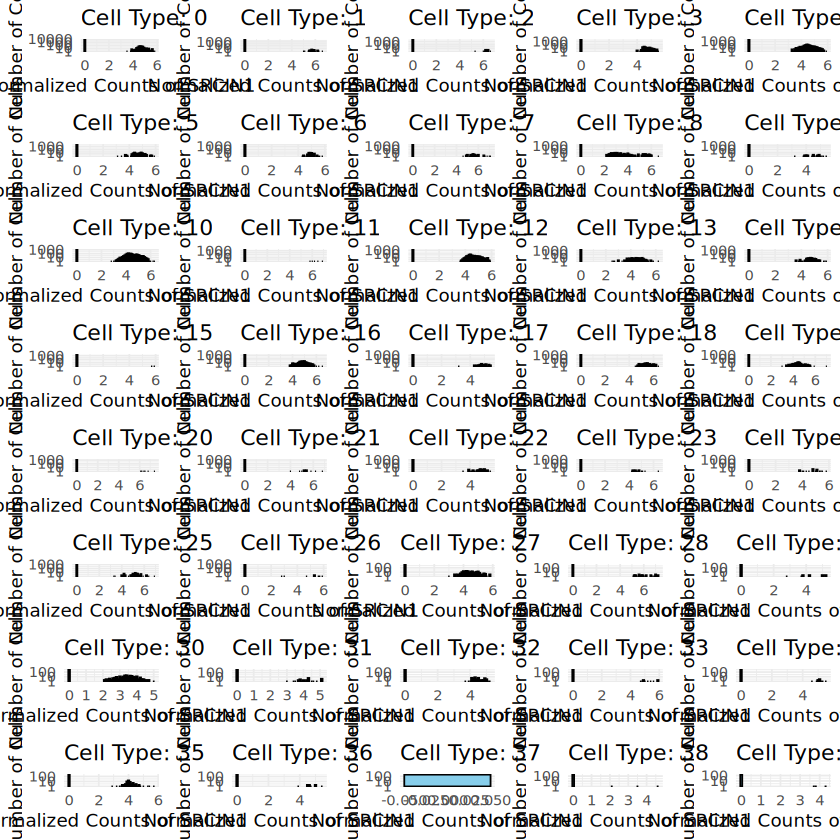

In [29]:
# Extract the normalized counts for the gene
goi<-3
gene_counts <- FetchData(sc_data, vars = genes_of_interest[goi])[, 1]  # Use [,1] to extract as a vector

# Get the cell type information (assuming it's stored in "seurat_clusters" or another metadata column)
clusters <- sc_data$seurat_clusters  # Or replace with your metadata column for cell types

# Create an empty list to store plots
plot_list <- list()

# Sort the unique cell types alphabetically
sorted_clusters <- sort(unique(clusters))

# For each sorted cell type, create a histogram of normalized counts for the gene
for (cluster in sorted_clusters) {
  # Subset the data by cell type
  cells_in_type <- which(clusters == cluster)
  gene_counts_type <- gene_counts[cells_in_type]
  
  # Create the plot for this cell type
  p <- ggplot(data.frame(counts = gene_counts_type), aes(x = counts)) +
    geom_histogram(binwidth = 0.1, fill = "skyblue", color = "black") +
    labs(title = paste("Cell Type:", cluster), x = paste("Normalized Counts of", "SRCIN1"), y = "Number of Cells") +
    theme_minimal() +
    scale_y_log10() # Apply log scale for y-axis
  
  # Append the plot to the list
  plot_list[[cluster]] <- p
}
#plot_list

# Combine all plots into a single image
combined_plot <- plot_grid(plotlist = plot_list, ncol = 5) +  # You can adjust ncol for more columns
theme(panel.background = element_rect(fill = 'white', colour = 'white'))
print(combined_plot)

# Save the plot
ggsave(paste0("Results/gene_distribution_by_cluster_",genes_of_interest[goi],"_",timepoints[i],".png"), combined_plot, width = 12, height = 10)


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 53 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 54 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 45 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 34 rows containing missing values or values outside the scale range (`geom_bar()`).”
Warni

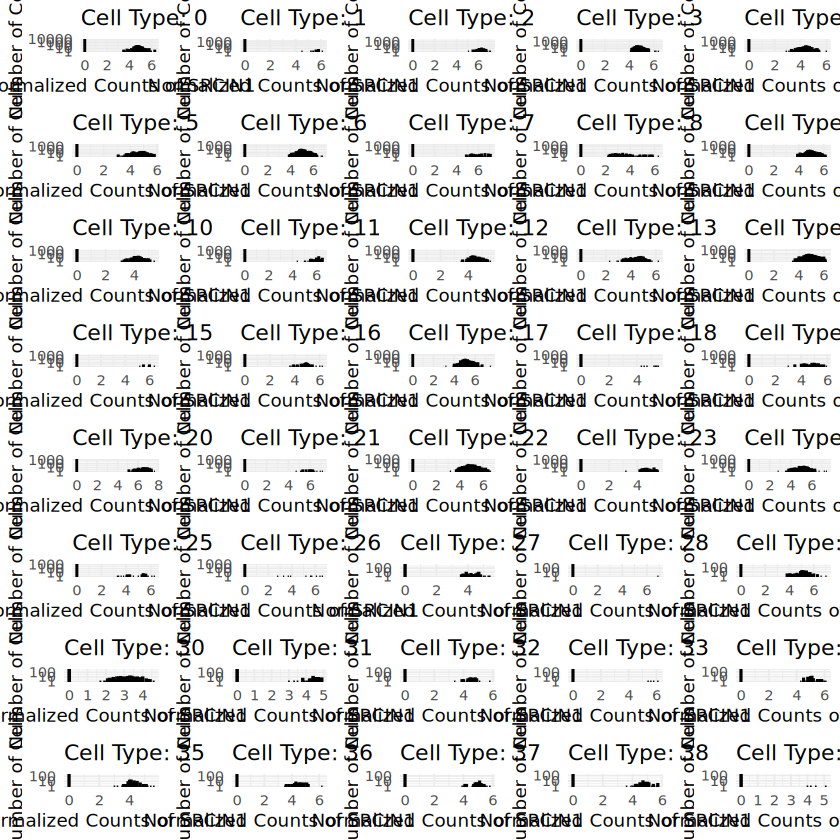

In [30]:
# Extract the normalized counts for the gene
goi<-1
gene_counts <- FetchData(sc_data, vars = genes_of_interest[goi])[, 1]  # Use [,1] to extract as a vector

# Get the cell type information (assuming it's stored in "seurat_clusters" or another metadata column)
clusters <- sc_data$seurat_clusters  # Or replace with your metadata column for cell types

# Create an empty list to store plots
plot_list <- list()

# Sort the unique cell types alphabetically
sorted_clusters <- sort(unique(clusters))

# For each sorted cell type, create a histogram of normalized counts for the gene
for (cluster in sorted_clusters) {
  # Subset the data by cell type
  cells_in_type <- which(clusters == cluster)
  gene_counts_type <- gene_counts[cells_in_type]
  
  # Create the plot for this cell type
  p <- ggplot(data.frame(counts = gene_counts_type), aes(x = counts)) +
    geom_histogram(binwidth = 0.1, fill = "skyblue", color = "black") +
    labs(title = paste("Cell Type:", cluster), x = paste("Normalized Counts of", "SRCIN1"), y = "Number of Cells") +
    theme_minimal() +
    scale_y_log10() # Apply log scale for y-axis
  
  # Append the plot to the list
  plot_list[[cluster]] <- p
}
#plot_list

# Combine all plots into a single image
combined_plot <- plot_grid(plotlist = plot_list, ncol = 5) +  # You can adjust ncol for more columns
theme(panel.background = element_rect(fill = 'white', colour = 'white'))
print(combined_plot)

# Save the plot
ggsave(paste0("Results/gene_distribution_by_cluster_",genes_of_interest[goi],"_",timepoints[i],".png"), combined_plot, width = 12, height = 10)


In [17]:
genes_of_interest[3]

[1] "CIT"